In [34]:
%matplotlib inline  
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from matplotlib import pyplot as plt


### Reading and Standardizing the given data.

In [20]:
data = pd.read_csv('../data/raw/takehome.csv')
data.set_index('call_id',inplace=True)
X=data.values
X = StandardScaler().fit_transform(X)


### Applying Feature Reduction using Principal Component Analysis

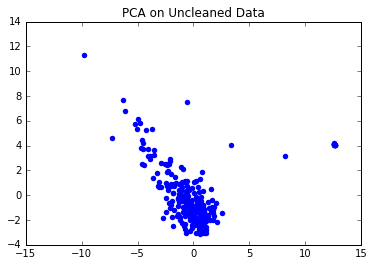

In [27]:
pca = PCA(n_components=2)
X_r=pca.fit_transform(X)
plt.title('PCA on Uncleaned Data')
plt.scatter(X_r[:,0],X_r[:,1],marker='o',linewidths=0,s=30)

### Applying K-Means to detect outliers.

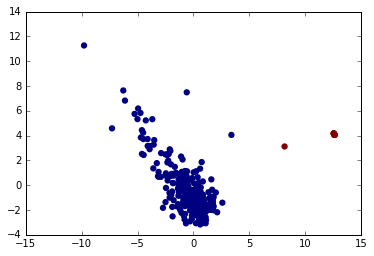

In [60]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_r)
plt.scatter(X_r[:,0],X_r[:,1],marker='o',c=kmeans.labels_,linewidths=0,s=40)

The outliers are shown in red. The method however is not removing all outliers, hence is not efficient.

### Detecting outliers using Density-based spatial clustering (DBSCAN) 

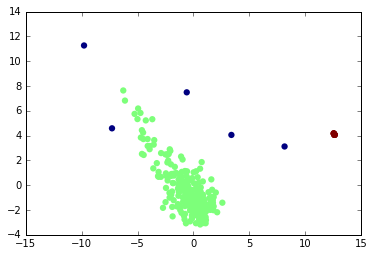

In [72]:
dbscan = DBSCAN(eps=2, min_samples=4).fit(X_r)
plt.scatter(X_r[:,0],X_r[:,1],marker='o',c=dbscan.labels_,linewidths=0,s=40)

As seen above the DBSCAN algorithm efficiently removes outliers from the raw data, owing to the fact that it is highly dependent on proximity from neihbourhood points and not merely on distance from center of clusters ( like K-Means).  The red and blue points are detected as outliers.

### Removing outliers  and noise from the raw data 


In [91]:
outliers = np.where((dbscan.labels_==-1) | (dbscan.labels_ == 1))
'''
The data points labelled as '-1' by DBSCAN are low density points which can be inpterpreted as noise. 
The points labelled as '1' belong to a cluster far away from our main cluster. Hence can be interpreted as outliers.
'''
inliers = np.where(dbscan.labels_==0)
clean_call_ids = data.index.values[inliers]
outlier_call_ids = data.index.values[outliers]
dirty_data = data.ix[outlier_call_ids]
clean_data = data.ix[clean_call_ids]

### 

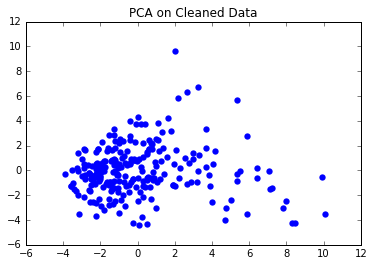

In [90]:
X_clean = clean_data.values
X_clean = StandardScaler().fit_transform(X_clean)
pca = PCA(n_components=2)
X_clean_r=pca.fit_transform(X_clean)
plt.title('PCA on Cleaned Data')
plt.scatter(X_clean_r[:,0],X_clean_r[:,1],marker='o',linewidths=0,s=40)

We have now removed the noise and outliers from the raw data and applied PCA again on the cleaned data, to visualize whether are there any blatant outliers still remaining. As it can be seen, the data looks relatively clean now. 

In [89]:
dirty_data.head()

,O-A-overtalk-incidents,O-A-overtalk-ratio,O-C-overtalk-incidents,O-C-overtalk-ratio,O-overtalk-incidents,O-overtalk-ratio,S-A-intra-call-change-in-sentiment,S-A-sentiment,S-call-change-in-sentiment,S-call-sentiment,...,TTR-C-average-streak,TTR-C-intra-call-change-in-talk-rate,TTR-C-longest-streak,TTR-C-median-streak,TTR-C-talk-rate,TTR-C-talk-ratio,TTR-longest-streak,TTR-median-streak,TTR-silence-incidents,TTR-silence-ratio
call_id,,,,,,,,,,,,,,,,,,,,,
2062,165,0.414403,139,0.321488,304,0.735890,1.085392,0.923077,1.056189,0.93097,...,35.634,1.058328,171.44,19.04,168,0.838504,171.44,18.395,0,0.040298
2067,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,1.00000,...,0.000,0.000000,0.00,0.00,0,0.000000,0.48,0.480,0,0.000000
2092,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,1.00000,...,0.000,0.000000,0.00,0.00,0,0.000000,1.64,1.640,0,0.000000
2235,0,0.000000,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,1.00000,...,0.000,0.000000,0.00,0.00,0,0.000000,0.58,0.410,0,0.000000
2261,0,0.000000,1,0.297297,1,0.297297,0.000000,1.000000,0.000000,1.00000,...,0.570,0.000000,0.57,0.57,0,0.385135,1.35,0.960,0,0.000000


In [87]:
clean_data.to_csv('../data/processed/clean_data.csv')
dirty_data.to_csv('../data/processed/dirty_data.csv')